Authros: Mahmud Hasan , Giulia Vecchioni 

License : MIT

Notebook Title: Sea level rise analysis using SLA data

Data used : Sea level daily gridded data from satellite observations for the Mediterranean

##Contents

Section1-> [Section1](#section1)

Section2-> [Section2](#section2)

Section3-> [Section3](#section3) 

#Section1 [Back to top](#top)

Uploading Python packages 

In [219]:
import numpy as np
import glob
import inspect
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import os
import warnings
from mpl_toolkits.basemap import Basemap
import xarray as xr
import scipy 
from scipy import stats
import pandas as pd

#Section2 [Back to top](#top)

downloading the dataset from the Wekeo Dias portal

In [2]:
# ralative path, change according to system/PC 
rdir="/Users/mahmud/statistics/plot_exercises/sla_dir/"
path =("/Volumes/LaCie_poseidone/sla_93-20")

#files_dir= os.path.join(path)
files= (path+"/*.nc")

## Reading single file and retrive lat , lon values
file =xr.open_dataset(files[0])
lat = file.variables["latitude"][:]
lon =file.variables["longitude"][:]
t = file["time"]
nlat= len(lat)
nlon = len(lon)


# target vairables specification 
sla= file["sla"][:]
ugva = file["ugosa"][:]   # geotropic velocity anomalies U- zonal component
vgva =file["vgosa"][:]  # geotropic velocity anomalies :V-meridonial component 

sla_files=xr.open_mfdataset(files,combine='nested',parallel=True, concat_dim= ['time'])
sla_series=sla_files["sla"][:]

## Finding  sea point indices in model grids
#- Western Mediterranean 
alb= [-3.7, 36.05]  # Alboran sea  location
lion=[ 5.1, 41.6]   # Gulf of Lion locaiton
tyr = [12.1, 39.5] 
sic = [12.0, 36.5]
#- Eastern Mediterrnean 
adr= [18, 41.7]    # Adriatic ne location
agean = [24.8, 36.2] #Agean sea new locaiton
ionian= [18.7,36.7] # Iionnian ea new locaiton
levantine= [32.8, 33.2] # Levantine sea new locaiton
  


# creating out and figs directory 
outpath= rdir+ "sla_figs/"
if not os.path.isdir(outpath):
    os.mkdir(outpath)
analysis = rdir + "sla_analysis/"
if not os.path.isdir(analysis):
    os.mkdir(analysis)


#Section3 [Back to top](#top)

Selecting random locations for single grid time series analysis 

In [90]:
# function for single grid location values
def single_grid(lati,long,loc):
    loc_ln = np.where(long>loc[0])[0]
    loc_lt = np.where(lati>loc[1])[0]
    loc_grid=[loc_ln[0],loc_lt[0]]
    return loc_grid
  
alb_loc=single_grid(lat,lon, alb)             #Alboran sea
lione_loc= single_grid(lat, lon, lion)        # Gulf of Lione
adr_loc=single_grid(lat,lon, adr)             # Adriatic Sea
levan_loc= single_grid(lat, lon, levantine)   # Levantine Sea

lon_list1 =list([alb_loc[0],lione_loc[0]])
lat_list1=list([alb_loc[1], lione_loc[1]])
lon_list2 =list([ adr_loc[0],levan_loc[0]])
lat_list2=list([adr_loc[1],levan_loc[1]])


def sgrid_values(series, list1, list2):
    loc_val = []
    for i in range(2):
        sl_value = series[:,list1[i],list2[i]]
        loc_val.append(sl_value)
    return loc_val

east=sgrid_values(sla_series,lat_list1, lon_list1)
west=sgrid_values(sla_series, lat_list2, lon_list2)


# for i in range(2):
#     sla1_value = sla_series[:,lat_list1[i],lon_list1[i]]
#     east_list.append(sla1_value)
# west_list = []
# for i in range(2):
#     sla2_value = sla_series[:,lat_list2[i],lon_list2[i]]
#     west_list.append(sla2_value)

# east_list =np.nan_to_num(east_list)
# west_list =np.nan_to_num(west_list)

#Section4 [Back to top](#top)

Plotting section for  SLA data analyses 


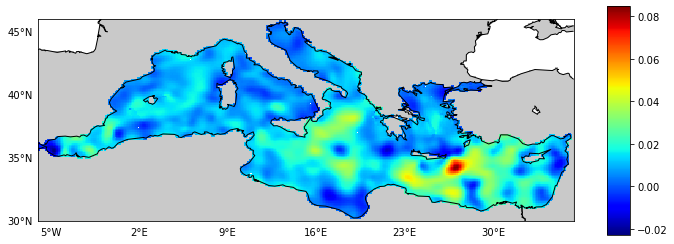

In [336]:
#--Plot-1: mean SLA for the period 1993-2020
sla_mean= np.mean(sla_series, axis=0)

fig,ax =plt.subplots(1,1,figsize=(12,6))
for iplot in range(1):
    for zplot in range(1):
        m= Basemap(projection='cyl', resolution='l',llcrnrlat= 30,urcrnrlat= 46, llcrnrlon= -6.0, urcrnrlon = 36.4)
        m.drawcoastlines(linewidth=1)
        m.drawparallels(range(30,48,5), linewidth=0, dashes=[0, 1], labels=[1,0,0,1], color='r', zorder=0 )
        m.drawmeridians(range(-5, 36, 7), linewidth=1, dashes=[0, 1], labels= [1,0,0,1])
        m.fillcontinents(alpha=0.9)
        m.drawlsmask(land_color='0.7', ocean_color='w', resolution='l', grid=5, lsmask_lons=None )
        cb= plt.pcolor(lon,(lat),trend_sla[0,:,:], cmap="jet")
        plt.colorbar(cb,orientation ="vertical", shrink =0.7, aspect=10, pad=0.05)
        
plt.savefig(outpath+"sla_mean_1993.2020.jpeg",dpi=100)

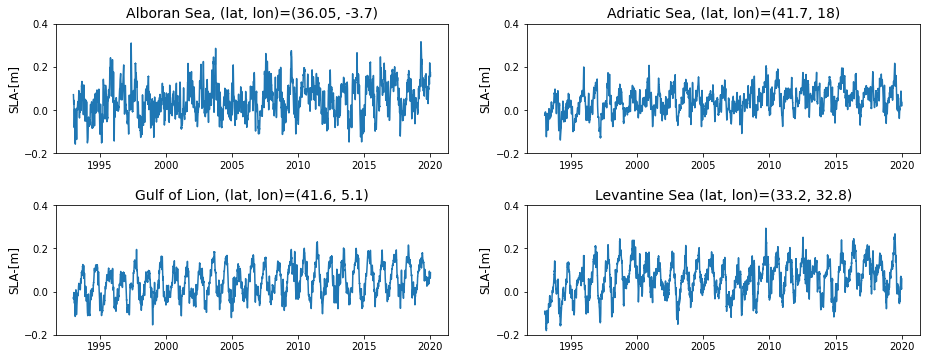

In [215]:
##--Plot2: time series for 4 random location in the Mediterranean Sea
sea1 = ["Alboran Sea, ","Gulf of Lion"]
sea2=  [ "Adriatic Sea, ", "Levantine Sea "]
sea1_locs = [alb, lion]
sea2_locs=  [adr, levantine]

fig,ax =plt.subplots(2,2,figsize=(15,6))
yr=np.linspace(1993, 2020, 10016)

for iplot in range(2):
    for zplot in range(2):    

        if zplot==0:
            ax[iplot][zplot].plot(yr, east[iplot]) 
            #ax1[1].plot(yr, sla_list[1]) 
            #ax[iplot][zplot].plot(yr, sla_list[1]) 
            ax[iplot][zplot].set_title(sea[iplot]+ "(lat, lon)=("+str(sea1_locs[iplot][1])+", "+str(sea1_locs[iplot][0])+")", fontsize=14) 
            #ax[iplot][zplot].set_xlabel(plot_info[0], size='13')
            ax[iplot][zplot].set_ylim(-0.2, 0.4)  

        if zplot==1:
          
            ax[iplot][zplot].plot(yr, west[iplot])
            #ax[1].plot(yr, sla_list[3] )#+ r"$\alpha$=0.2"         
            r_range=[-0.2, 0.4]
            ax[iplot][zplot].set_title(sea2[iplot]+ "(lat, lon)=("+str(sea2_locs[iplot][1])+", "+str(sea2_locs[iplot][0])+")", fontsize=14)
#             ax[iplot][zplot].set_xlabel(plot_info[0], size='13')
            ax[iplot][zplot].set_ylim(r_range[0], r_range[1])
             
#             ax[iplot][zplot].legend(facecolor='inherit', fontsize=12, loc="upper right")
        ax[iplot][zplot].set_ylabel("SLA-[m]", size ='12' )

    plt.subplots_adjust(left=0.11, bottom=0.08, right=0.91, top=0.80, wspace=0.2, hspace=0.4)


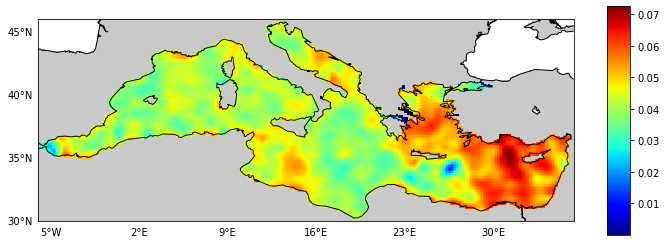

In [338]:
#- plot3- Sealevel trend analysis in the MedSea for the period 1993-2020: section1
from scipy import signal 

sla_series=np.nan_to_num(sla_series)
sla_mask = np.ma.masked_where(sla_series==0, sla_series)
dtrend= np.zeros((sla_series.shape))

for i in range(nlat):
    for j in range(nlon):
        dtrend[:,i,j]= signal.detrend(sla_mask[:,i,j],axis=0, type='linear')

sla_trend= sla_mask[:,:,:]-dtrend[:,:,:]

sla_trend_icept = sla_trend[0,:,:]  # INtercept 
sla_trend_slp= sla_trend[1,:,:,]-sla_trend[0,:,:]  ##.  Slope

sla_trend_mean= np.mean(sla_trend, axis=0)
fig,ax =plt.subplots(1,1,figsize=(12,6))
for iplot in range(1):
    for zplot in range(1):
        m= Basemap(projection='cyl', resolution='l',llcrnrlat= 30,urcrnrlat= 46, llcrnrlon= -6.0, urcrnrlon = 36.4)
        m.drawcoastlines(linewidth=1)
        m.drawparallels(range(30,48,5), linewidth=0, dashes=[0, 1], labels=[1,0,0,1], color='r', zorder=0 )
        m.drawmeridians(range(-5, 36, 7), linewidth=1, dashes=[0, 1], labels= [1,0,0,1])
        m.fillcontinents(alpha=0.9)
        m.drawlsmask(land_color='0.7', ocean_color='w', resolution='l', grid=5, lsmask_lons=None )
        cb= plt.pcolor(lon,(lat),sla_trend_mean[:,:], cmap="jet")
        plt.colorbar(cb,orientation ="vertical", shrink =0.7, aspect=10, pad=0.05)

plt.savefig(analysis+"sla_mean_tredn_1993_2020.jpeg",dpi=100)

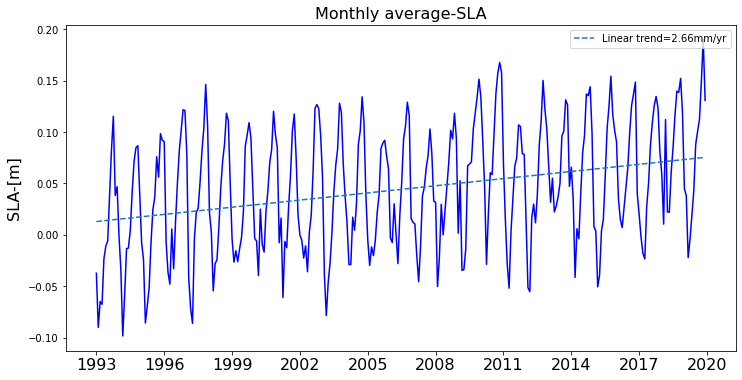

In [334]:
##--plot4 - SLA trend analysis section2
dt=pd.date_range(start='1993-01-01', end='2020-06-03',freq='D')
sla_mask=xr.DataArray(sla_mask,dims=['time','lat','lon'], coords= dict(time=dt))
sla_trend=xr.DataArray(sla_trend,dims=['time','lat','lon'], coords= dict(time=dt))


sla_surf_mean= np.mean(sla_mask, axis= (1,2))

yr_d1= pd.date_range(start='1993-01-01',end= '2020-01-01',freq='YS')
yr_d365= pd.date_range(start='1993-12-31',end= '2020-06-03',freq='Y')


def surface_monthly_mean(xarr): 
    monwise_mean= []
    idx=0
    for i in range(27):
        yr_slice=xarr.sel(time=slice(yr_d1[i],yr_d365[i]) )
        #yr_slice=xr.DataArray(yr_slice,dims=['time','lat','lon'])
        months_mean=yr_slice.groupby('time.month').mean('time')
        monwise_mean.append(months_mean)
        i+=1
    surf_mmn_series= np.concatenate(monwise_mean, axis=0)
    return surf_mmn_series

sla_surf_mm=surface_monthly_mean(sla_surf_mean)   # surface/basin averaged month-wise mean 
sla_mon_mn=np.repeat((np.average(sla_surf_mm)),360)  # surface/basin averaged SLA 

sla_trend_surfmn =np.mean(sla_trend, axis=(1,2))
sla_tr_sfmn_mon= surface_monthly_mean(sla_trend_surfmn)   # monthwise trend values for 27 yrs

def surface_yrly_mean(xarr):
    yrwise_mean= []
    idx=0
    for i in range(27):
        yrs_slice=xarr.sel(time=slice(yr_d1[i],yr_d365[i]) )
        #yr_slice=xr.DataArray(yr_slice,dims=['time','lat','lon'])
        yrs_mean=yrs_slice.groupby('time.year').mean('time')
        yrwise_mean.append(yrs_mean)
        i+=1
    surf_yrmn_series= np.concatenate(yrwise_mean, axis=0)
    return surf_yrmn_series 

sla_yrs_mn = surface_yrly_mean(sla_surf_mean)
sla_rate= ((sla_yrs_mn[-1]-sla_yrs_mn[0])/27)*1000

# -- yearly time series for x -axis
xdata= np.arange(0,(2020-1993+1)*12,12*3 )
xlabels= np.arange(1993, 2020+1, 3)

# ---plotting of surface monthly mean
fig,axs=plt.subplots(1,1,figsize=(12,6))
#plt.sca(axs[1,1])
plt.plot( sla_surf_mm,'-b', label="")
plt.plot(sla_tr_sfmn_mon,'--', label="Linear trend="+ "{:.2f}".format(sla_rate)+" mm/yr")

plt.title("Monthwise average-SLA:1993-2020",fontsize=16)
plt.legend(facecolor='inherit', fontsize=10, loc="upper right")
plt.ylabel("SLA-[m]",fontsize=16,labelpad= 6)
plt.xticks(xdata,xlabels)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='minor', labelsize=22)
#plt.tick_params(axis='both', which='major', labelsize=16)
